In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data  
tf.__version__

'1.15.2'

In [4]:
input_data

<module 'tensorflow.examples.tutorials.mnist.input_data' from '/tensorflow-1.15.2/python3.7/tensorflow_core/examples/tutorials/mnist/input_data.py'>

In [6]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True);

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


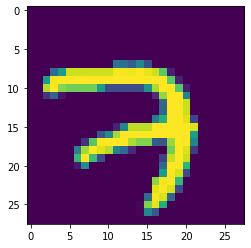

In [15]:
plt.imshow(mnist.train.images[0].reshape(28,28))
print(mnist.train.labels[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


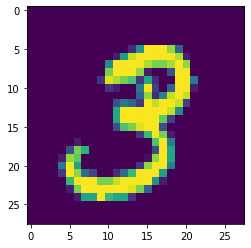

In [14]:
plt.imshow(mnist.train.images[1].reshape(28,28))
print(mnist.train.labels[1])

In [16]:
#Model

In [17]:
X = tf.placeholder(tf.float32,shape=[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
I = tf.matmul(X,W) + b

In [18]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [20]:
individual_loss = tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits = I)
loss_function = tf.reduce_mean(individual_loss);

In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train = optimizer.minimize(loss_function)

In [25]:
#Session
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for step in range(1000):
    batch_x,batch_y = mnist.train.next_batch(1000)
    sess.run(train,feed_dict={X:batch_x,y_true:batch_y})
  matches = tf.equal(tf.argmax(I,1),tf.argmax(y_true,1))
  acc = tf.reduce_mean(tf.cast(matches,tf.float32))
  print(sess.run(acc,feed_dict={X:mnist.test.images,y_true:mnist.test.labels}))

0.9222
